<a href="https://colab.research.google.com/github/Rawab/DS-Sprint-02-Storytelling-With-Data/blob/master/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

In [0]:
!pip install --upgrade seaborn

In [15]:
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
employment = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--aged_15plus_employment_rate_percent--by--geo--time.csv')
# x-axis
work_week =pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--working_hours_per_week--by--geo--time.csv')
# y-axis
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
# size
#lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

#population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
# color for region
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

Expectations: 


> Increase in employment => Increased income, Decreased work week

> Increase in time => Increased employment, increased income, decreased work week



In [20]:
employment.shape, work_week.shape, income.shape, entities.shape, concepts.shape

((6048, 3), (1625, 3), (44268, 3), (44370, 3), (273, 33), (590, 16))

In [14]:
employment.head()

,geo,time,aged_15plus_employment_rate_percent
0,afg,1991,45.331
1,afg,1992,46.178
2,afg,1993,45.381
3,afg,1994,45.467
4,afg,1995,47.369


In [23]:
entities[entities.country=='afg']

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia


In [0]:
variables = ['country', 'name', 'world_6region']

In [58]:
df = pd.merge(employment, work_week)
df = pd.merge(df, income)
df.head()

,geo,time,aged_15plus_employment_rate_percent,working_hours_per_week,income_per_person_gdppercapita_ppp_inflation_adjusted
0,alb,1998,48.795,39.0000,4461
1,alb,2007,48.373,44.9111,8448
2,alb,2008,47.871,42.2220,9154
3,alb,2009,47.030,42.1400,9525
4,alb,2010,46.564,41.1420,9927


In [0]:
df = pd.merge(df, entities[variables], how='inner',
              left_on='geo', right_on='country')

In [60]:
df.drop(columns=['geo', 'country'], inplace=True)

df.rename(columns={'time': 'year',
                  'aged_15plus_employment_rate_percent': 'employmentrate',
                  'working_hours_per_week': 'workweek',
                  'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
                   'name': 'country',
                  'world_6region': 'region'},
         inplace=True)

print(df.shape) # Drop in observations due to inner joining
df.head()

(1530, 6)


,year,employmentrate,workweek,income,country,region
0,1998,48.795,39.0000,4461,Albania,europe_central_asia
1,2007,48.373,44.9111,8448,Albania,europe_central_asia
2,2008,47.871,42.2220,9154,Albania,europe_central_asia
3,2009,47.030,42.1400,9525,Albania,europe_central_asia
4,2010,46.564,41.1420,9927,Albania,europe_central_asia


In [61]:
df.country.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Brunei', 'Botswana',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Congo, Dem. Rep.', 'Colombia', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'United Kingdom', 'Ghana', 'Gambia', 'Greece',
       'Guatemala', 'Hong Kong, China', 'Honduras', 'Croatia', 'Hungary',
       'Indonesia', 'Ireland', 'Iran', 'Iceland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic',
       'Cambodia', 'South Korea', 'Lao', 'Liberia', 'Sri Lanka',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao, China', 'Morocco',
       'Moldova', 'Mada

In [103]:
big = df[df.country.isin(['United States','China','Russia','India'])]
big[big.year.isin([1985, 1995, 2005, 2015])] # 1985 is missing

,year,employmentrate,workweek,income,country,region
254,2005,70.341,47.8000,5719,China,east_asia_pacific
1311,2015,60.112,39.2855,24124,Russia,europe_central_asia
1472,1995,62.060,39.3000,39476,United States,america
1482,2005,61.755,36.8802,49762,United States,america
1492,2015,58.740,36.5766,52790,United States,america


In [68]:
year2015 = df[df.year==2015]
year2015.sample(5)

,year,employmentrate,workweek,income,country,region
437,2015,41.709,46.1678,10096,Egypt,middle_east_north_africa
1135,2015,51.265,47.0445,4695,Pakistan,south_asia
1279,2015,87.420,50.0000,119749,Qatar,middle_east_north_africa
1343,2015,42.689,41.8897,13278,Serbia,europe_central_asia
1104,2015,62.100,34.3340,63670,Norway,europe_central_asia


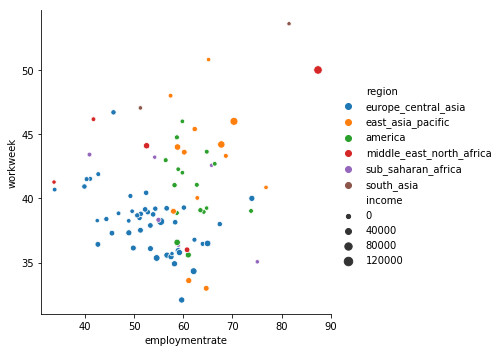

In [71]:
sns.relplot(x='employmentrate', y='workweek',
            hue='region', size='income', data=year2015);

In [72]:
year2015[year2015.employmentrate > 70]
# Suprised by Ghana, Nepal, and Vietnam
# Very low income

,year,employmentrate,workweek,income,country,region
565,2015,75.064,35.0635,3930,Ghana,sub_saharan_africa
737,2015,73.953,40.0029,42674,Iceland,europe_central_asia
938,2015,70.310,46.0000,100518,"Macao, China",east_asia_pacific
1108,2015,81.520,53.6000,2301,Nepal,south_asia
1167,2015,73.787,39.0245,11768,Peru,america
1279,2015,87.420,50.0000,119749,Qatar,middle_east_north_africa
1512,2015,76.834,40.8557,5667,Vietnam,east_asia_pacific


In [80]:
year2015[year2015.country=='United States']

,year,employmentrate,workweek,income,country,region
1492,2015,58.74,36.5766,52790,United States,america


In [0]:
qatar = year2015[year2015.country == 'Qatar']
nepal = year2015[year2015.country == 'Nepal']

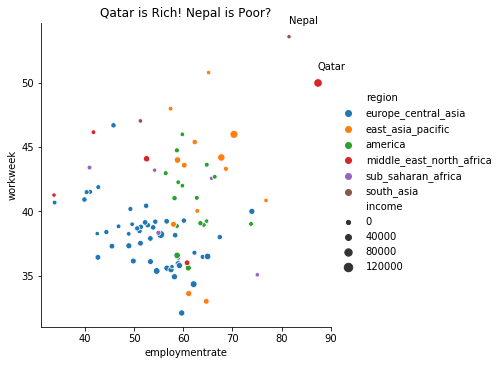

In [87]:
sns.relplot(x='employmentrate', y='workweek',
            hue='region', size='income', data=year2015);

plt.text(x=qatar.employmentrate.values[0]-.02, 
         y=qatar.workweek.values[0]+1,
        s='Qatar')

plt.text(x=nepal.employmentrate.values[0]-.02, 
         y=nepal.workweek.values[0]+1,
        s='Nepal')

plt.title('Qatar is Rich! Nepal is Poor?');

In [95]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
decade = df[df.year.isin(years)]
decade.sample(5)

,year,employmentrate,workweek,income,country,region
166,2015,63.942,36.46154,17230,Belarus,europe_central_asia
1488,2011,57.376,36.23920,49791,United States,america
1323,2011,65.066,45.90000,75013,Singapore,east_asia_pacific
953,2014,63.540,41.00000,11899,Maldives,south_asia
130,2011,68.986,41.55420,1821,Benin,sub_saharan_africa


In [0]:
for year in years:
  sns.relplot(x='employmentrate', y='workweek', hue='region',
             size='income', data=df[df.year==year]);

In [0]:
year = 2000 #@param {type: "slider", min:1985, max: 2015, step:1}

sns.relplot(x='employmentrate', y='workweek', hue='region',
            size='income', data=df[df.year==year]);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

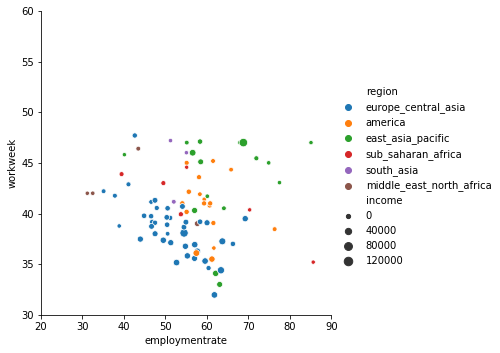

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

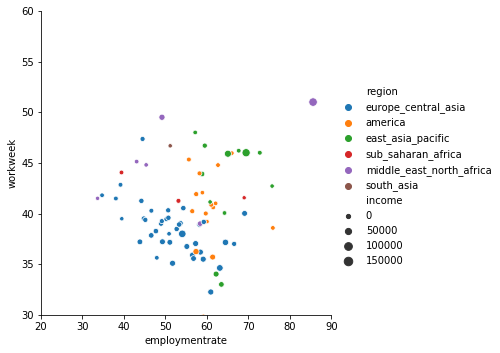

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

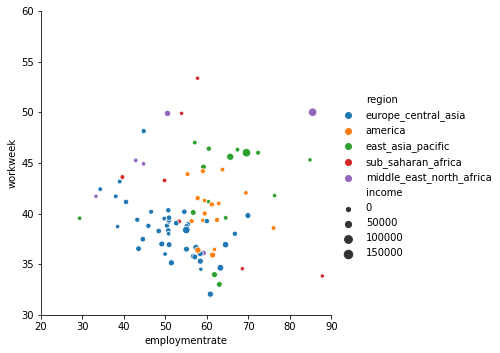

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

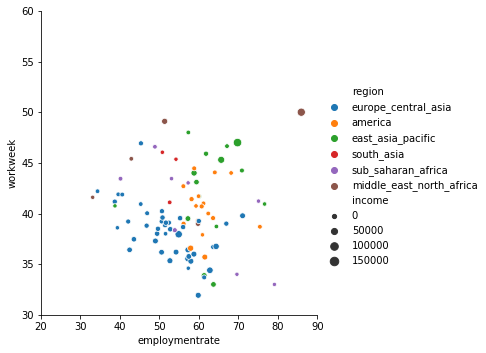

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

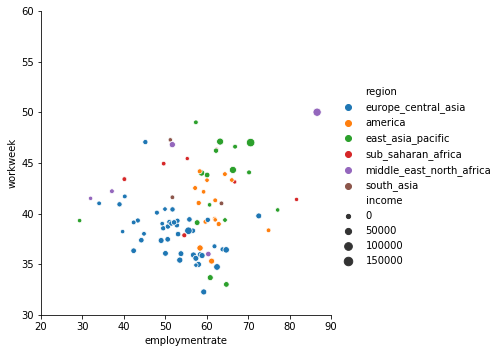

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

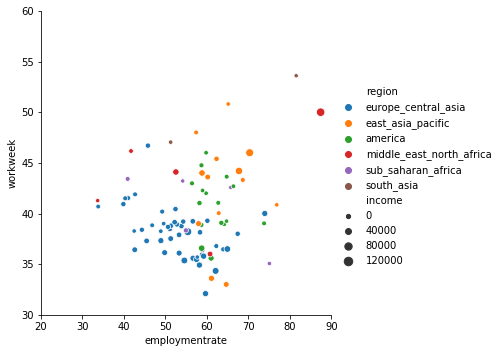

<IPython.core.display.Javascript object>

In [101]:
from google.colab import widgets
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
  sns.relplot(x='employmentrate', y='workweek', hue='region',
              size='income', data=df[df.year==year]);
  plt.xlim(20, 90)
  plt.ylim(30, 60)